In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib
from matplotlib import pyplot
from tensorflow.keras import models,layers,optimizers,utils
import sklearn

In [5]:
url="/content/iris.csv"
names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset=pd.read_csv(url,names=names)

In [6]:
array=dataset.values

data=array[:,0:4]
print(data.shape)

labels=array[:,4]
print(labels.shape)


(150, 4)
(150,)


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
labels = encoder.fit_transform(labels)

print(labels)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
labels=pd.get_dummies(labels).values
labels[:5]

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False]])

In [9]:
data = np.asarray(data).astype('float32')

In [10]:
from sklearn.model_selection import train_test_split

train_data, validation_data, train_labels, validation_labels=train_test_split(data,labels, test_size=0.20, random_state=1)


In [11]:
print("Train Data Shape: ",train_data.shape)
print("Train Labels Shape: ",train_labels.shape)
print("Validation Data Shape: ",validation_data.shape)
print("validation labels Shape: ",validation_labels.shape)

Train Data Shape:  (120, 4)
Train Labels Shape:  (120, 3)
Validation Data Shape:  (30, 4)
validation labels Shape:  (30, 3)


# Model

In [12]:
from tensorflow.keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(4,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
loss_function = tf.keras.losses.CategoricalCrossentropy()


In [13]:


def fitness_function(weights, model, loss_function, x_train, y_train):
    # Split the weights into four parts for each layer
    input_size = 4
    weights_1_size = input_size * 16
    weights_2_size = 16 * 16
    weights_3_size = 16 * 8
    weights_4_size = 8 * 3

    weights_1 = weights[:weights_1_size].reshape((input_size, 16))
    weights_2 = weights[weights_1_size:weights_1_size + weights_2_size].reshape((16, 16))
    weights_3 = weights[weights_1_size + weights_2_size:weights_1_size + weights_2_size + weights_3_size].reshape((16, 8))
    weights_4 = weights[weights_1_size + weights_2_size + weights_3_size:].reshape((8, 3))

    # Set the weights of the model
    model.layers[0].set_weights([weights_1, np.zeros(16)])
    model.layers[1].set_weights([weights_2, np.zeros(16)])
    model.layers[2].set_weights([weights_3, np.zeros(8)])
    model.layers[3].set_weights([weights_4, np.zeros(3)])

    # Calculate the loss on the entire training dataset
    y_pred = model(x_train)
    loss = loss_function(y_train, y_pred)

    return loss.numpy()  # Assuming the loss function returns a tensor


In [14]:
vector_length=472
population_size=4720


In [15]:
import numpy as np

# Xavier Initialization for vectors
def xavier_init(shape):
    """
    Args:
    - shape (int): Size of the weight vector to initialize.
    """
    var = 2.0 / shape  # Variance
    return np.random.randn(shape) * np.sqrt(var)  # Sample from Gaussian distribution

# He Initialization for vectors
def he_init(shape):
    """
    Args:
    - shape (int): Size of the weight vector to initialize.
    """
    var = 2.0 / shape  # Variance
    return np.random.randn(shape) * np.sqrt(var)  # Sample from Gaussian distribution

# LeCun Initialization for vectors
def lecun_init(shape):
    """
    Args:
    - shape (int): Size of the weight vector to initialize.
    """
    limit = np.sqrt(3.0 / shape)  # Limit
    return np.random.uniform(-limit, limit, shape)  # Sample from uniform distribution

# Orthogonal Initialization for vectors

def orthogonal_init(size):
    """
    Generate an orthogonal vector of the specified size.

    Args:
        size (int): Size of the weight vector to initialize.

    Returns:
        numpy.ndarray: An orthogonal vector with the specified size.
    """
    a = np.random.normal(0.0, 1.0, size)  # Generate random vector
    q, _ = np.linalg.qr(a.reshape(-1, 1))  # Compute QR decomposition
    return q.flatten()  # Return orthogonal vector as a 1D array


def generate_random_weights(size, min_value=-1.0, max_value=1.0):
    """
    Generate random float numbers for weights of a neural network.

    Args:
    - size (int): The size of the weight vector.
    - min_value (float, optional): The minimum value for the generated weights. Default is -1.0.
    - max_value (float, optional): The maximum value for the generated weights. Default is 1.0.

    Returns:
    - numpy.ndarray: A 1D array containing random float numbers within the specified range.
    """
    return np.random.uniform(min_value, max_value, size)

def generate_random_vector(size, min_value=-1.0, max_value=1.0):
    """
    Generate a random vector with float numbers within a specified range.

    Args:
    - size (int): The size of the vector.
    - min_value (float, optional): The minimum value for the generated numbers. Default is -1.0.
    - max_value (float, optional): The maximum value for the generated numbers. Default is 1.0.

    Returns:
    - numpy.ndarray: A 1D array containing random float numbers within the specified range.
    """
    return np.random.uniform(min_value, max_value, size)


In [16]:
# Define the chromosome class to store genes and fitness
class chromosome:
    Genes = None
    Fitness = None
    def __init__(self, genes, fitness):
        self.Genes = genes
        self.Fitness = fitness

In [17]:
# Function to create the initial population

import time

def make_population(method, population_size):
    # Initialize the population on GPU
    with tf.device('/device:GPU:0'):
        vector_len = (28 * 28 * 512) + (512 * 10)

        # Initialize empty list for population
        population = []

        # Show progress bar (optional)
        from tqdm import tqdm  # Install tqdm library if needed
        pbar = tqdm(total=population_size)

        start_time = time.time()

            # Loop through the population size
        for i in range(population_size):
            # Create chromosome and fitness
            if method == 1:
                genes = xavier_init(vector_length)
            elif method == 2:
                genes = lecun_init (vector_length)
            else:
                genes = generate_random_weights(vector_length)

            fitness = fitness_function(genes, model, loss_function, train_data, train_labels)
            population.append(chromosome(genes, fitness))

            # Update progress bar (optional)
            pbar.update(1)

        # Print time taken (optional)
        end_time = time.time()
        print(f"Population creation completed in {end_time - start_time:.2f} seconds")

        # Close progress bar (optional)
        pbar.close()

    return population

# population = make_population(3, population_size)


In [18]:
population2 = make_population(4, population_size)


100%|██████████| 4720/4720 [00:51<00:00, 91.45it/s]

Population creation completed in 51.61 seconds


In [19]:
# Calculate fitness diversity
def calculate_fitness_diversity(population):
    # Extract fitness values from the population
    fitness_values = [individual.Fitness for individual in population]

    # Calculate the variance or standard deviation of fitness values
    fitness_variance = np.var(fitness_values)
    fitness_stddev = np.std(fitness_values)

    return fitness_variance, fitness_stddev

In [20]:
# Calculate fitness diversity
variance, stddev = calculate_fitness_diversity(population2)

print("Fitness Variance:", variance)
print("Fitness Standard Deviation:", stddev)

Fitness Variance: 82.137314
Fitness Standard Deviation: 9.0629635


**Mutation**:  **DE/current-to-best/1** mutation strategy, which is a common choice in JADE. The F parameter is adaptively updated and follows a Cauchy distribution, which is also typical in JADE.<br>
**Crossove**r:  **binomial** crossover with an adaptively updated CR parameter. This is again a standard choice in JADE.<br>
**Selection**: You’re using **greedy selection**, where an individual is replaced by its trial vector only if the trial vector has better fitness. This is the correct approach in DE.<br>
**Adaptive Parameters**: You’re updating the CR and F parameters based on successful parameters, which is a key feature of JADE. If no individuals are updated in a generation, you reset CR and F to their default values, which is a reasonable approach.<br>
**Stagnation Check**: You’re checking for stagnation in terms of improvement in the best fitness and terminate the algorithm if there are too many stagnant generations. This is a good strategy to prevent unnecessary computations when the algorithm is not making significant progress.

In [21]:
def sts_selection(population, subset_size):
    np.random.seed()  # Reset random seed
    surviving_population = []
    num_vectors = len(population)
    starting_point = np.random.randint(num_vectors)  # Randomly select starting point
    num_subsets = num_vectors // subset_size
    for j in range(num_subsets):
        start_index = (starting_point + j) % num_vectors
        end_index = (start_index + subset_size) % num_vectors
        subset_population = population[start_index:end_index]
        subset_population.sort(key=lambda x: x.Fitness)  # Sort by fitness
        surviving_population.extend(subset_population[:subset_size])
    return surviving_population

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy

# Define the chromosome class to store genes and fitness
class chromosome:
    Genes = None
    Fitness = None
    def __init__(self, genes, fitness):
        self.Genes = genes
        self.Fitness = fitness

def jade(fitness_function, population, dim=4019200, NP=300, CR=0.9, F=0.8, max_gen=4000, max_stagnant_generations=100):
    improvement_threshold = 1e-5
    memory_CR, memory_F = [], []
    best_fitness_progress = []  # List to store the best fitness value at each generation
    stagnant_generations = 0
    previous_best_fitness = float('inf')

    for gen in range(max_gen):
        mutants = np.empty((NP, dim))
        modified_indices = set()  # Keep track of individuals modified in this generation

        for i in range(NP):
            r1, r2, r3 = np.random.choice(range(len(population)), 3, replace=False)
            while r1 == i or r2 == i:
                r1, r2, r3 = np.random.choice(range(len(population)), 3, replace=False)

            best_index = np.argmin([pop.Fitness for pop in population])

            # Mutation (DE/current-to-best/1)
            F = cauchy.rvs(loc=0.5, scale=0.1)  # F follows a Cauchy distribution
            mutant_genes = population[i].Genes + F * (population[best_index].Genes - population[i].Genes) + \
                           F * (population[r1].Genes - population[r2].Genes)
            mutants[i] = mutant_genes[:dim]  # Ensure the mutant genes have the correct dimension

        cross_points = np.random.rand(NP, dim) < CR
        cross_points[np.arange(NP), np.random.randint(dim, size=NP)] = True  # Ensure at least one crossover

        trial_genes = np.where(cross_points, mutants, [pop.Genes for pop in population])
        trial_fitness = np.array([fitness_function(trial_genes[i], model, loss_function, train_data, train_labels) for i in range(NP)])

        improve_mask = trial_fitness < np.array([pop.Fitness for pop in population])
        for i in range(NP):
            if improve_mask[i]:
                population[i] = chromosome(trial_genes[i], trial_fitness[i])
                memory_CR.append(CR)
                memory_F.append(F)
                modified_indices.add(i)

        # Update CR and F based on successful parameters only
        if modified_indices:
            CR = (1 - 0.1) * CR + 0.1 * np.mean([memory_CR[i] for i in range(len(memory_CR))])
            F = (1 - 0.1) * F + 0.1 * np.mean([memory_F[i] for i in range(len(memory_F))])
        else:
            # Set default values for CR and F
            CR = 0.9
            F = 0.8

        # Perform Subset to Subset (STS) selection
        population = sts_selection(population, subset_size=10)  # Example: Set subset_size to 10

        # If STS selection results in fewer than NP individuals, fill up the remaining spots with new individuals
        while len(population) < NP:
            new_individual = chromosome(np.random.rand(dim), float('inf'))
            new_individual.Fitness = fitness_function(new_individual.Genes, model, loss_function, train_data, train_labels)
            population.append(new_individual)

        best_fitness = min(population, key=lambda x: x.Fitness).Fitness
        best_fitness_progress.append(best_fitness)

        # Print progress
        print(f"Generation {gen + 1}/{max_gen} - Best Fitness: {best_fitness}")

        # Check if the fitness threshold is reached
        if best_fitness <= 0.08:
            print(f"Terminating due to fitness threshold reached.")
            break

        # Check for improvement stagnation
        if previous_best_fitness - best_fitness < improvement_threshold:
            stagnant_generations += 1
        else:
            stagnant_generations = 0

        if stagnant_generations >= max_stagnant_generations:
            print(f"Terminating due to {max_stagnant_generations} stagnant generations.")
            break

        previous_best_fitness = best_fitness

        # Plot the progression at intervals
        if gen % 10 == 0:
            plt.plot(range(1, gen + 2), best_fitness_progress[:gen + 1])
            plt.xlabel('Generation')
            plt.ylabel('Best Fitness')
            plt.title('Progression of JADE Algorithm')
            plt.grid(True)
            plt.show()

    return min(population, key=lambda x: x.Fitness)


In [23]:
import copy
def run_algorithm_multiple_times(algorithm, fitness_function, population, num_runs=30, dim=4019200, NP=300, CR=0.9, F=0.8, max_gen=200):
    seeds = np.random.randint(1, 1000, size=num_runs)  # Generate random seeds for each run
    success_count = 0
    successful_seeds = []

    for i, seed in enumerate(seeds, start=1):
        np.random.seed(seed)  # Set the random seed for reproducibility
        print(f"Run {i}/{num_runs} - Random Seed: {seed}")

        # Generate a deep copy of the original population for this run
        population_copy = copy.deepcopy(population2)

        # Run the specified algorithm with specified kwargs
        best_individual = algorithm(fitness_function, population_copy, dim=dim, NP=NP, CR=CR, F=F, max_gen=max_gen)

        # Check if the best fitness meets the success criteria
        if best_individual.Fitness <= 0.08:
            success_count += 1
            successful_seeds.append(seed)

    success_rate = success_count / num_runs * 100
    print(f"\nSuccess Rate: {success_rate:.2f}%")

    return successful_seeds

Run 1/5 - Random Seed: 225
Generation 1/200 - Best Fitness: 0.3971365988254547


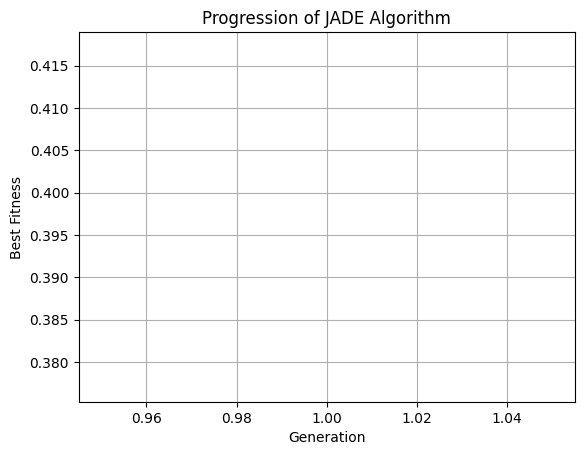

Generation 2/200 - Best Fitness: 0.8039188385009766
Generation 3/200 - Best Fitness: 0.6349446773529053
Generation 4/200 - Best Fitness: 0.4142056107521057
Generation 5/200 - Best Fitness: 0.42309048771858215
Generation 6/200 - Best Fitness: 0.2649223208427429
Generation 7/200 - Best Fitness: 0.5448161959648132
Generation 8/200 - Best Fitness: 0.23804377019405365
Generation 9/200 - Best Fitness: 0.22045224905014038
Generation 10/200 - Best Fitness: 0.3136403262615204
Generation 11/200 - Best Fitness: 0.1535751223564148


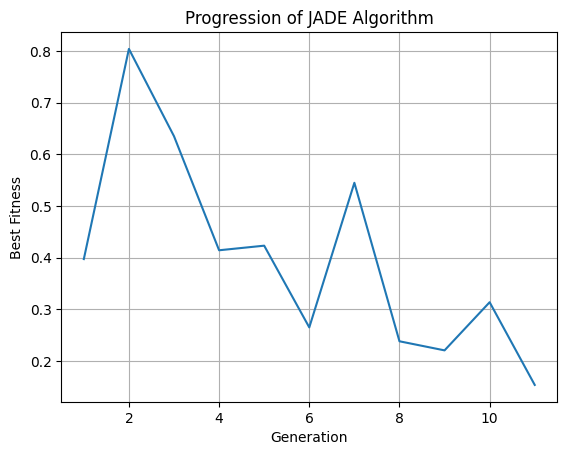

Generation 12/200 - Best Fitness: 0.13045869767665863
Generation 13/200 - Best Fitness: 0.1841868758201599
Generation 14/200 - Best Fitness: 0.09124965965747833
Generation 15/200 - Best Fitness: 0.10256531834602356
Generation 16/200 - Best Fitness: 0.12073899805545807
Generation 17/200 - Best Fitness: 0.08985134959220886
Generation 18/200 - Best Fitness: 0.08985134959220886
Generation 19/200 - Best Fitness: 0.09214068949222565
Generation 20/200 - Best Fitness: 0.09262695163488388
Generation 21/200 - Best Fitness: 0.09804218262434006


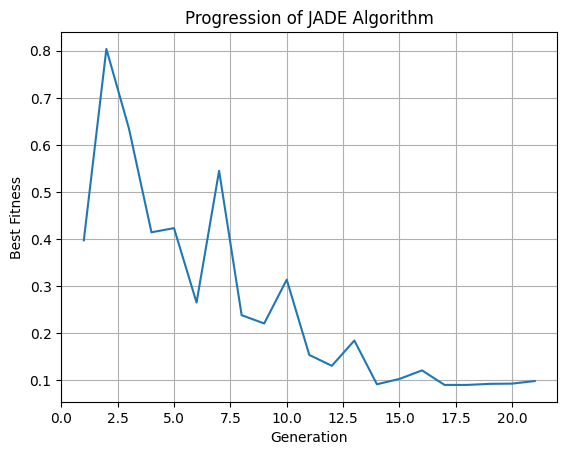

Generation 22/200 - Best Fitness: 0.09804218262434006
Generation 23/200 - Best Fitness: 0.08516454696655273
Generation 24/200 - Best Fitness: 0.07907794415950775
Terminating due to fitness threshold reached.
Run 2/5 - Random Seed: 209
Generation 1/200 - Best Fitness: 0.6171361804008484


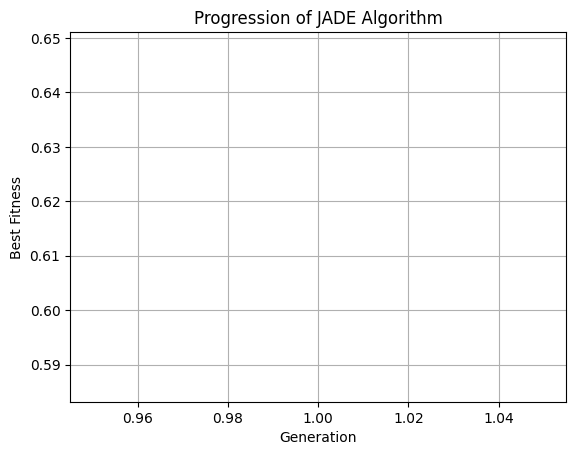

Generation 2/200 - Best Fitness: 0.8563310503959656
Generation 3/200 - Best Fitness: 0.1855693757534027
Generation 4/200 - Best Fitness: 0.5677095055580139
Generation 5/200 - Best Fitness: 0.4559856951236725
Generation 6/200 - Best Fitness: 0.45205625891685486
Generation 7/200 - Best Fitness: 0.45887261629104614
Generation 8/200 - Best Fitness: 0.47553959488868713
Generation 9/200 - Best Fitness: 0.2937852740287781
Generation 10/200 - Best Fitness: 0.45856624841690063
Generation 11/200 - Best Fitness: 0.2935788035392761


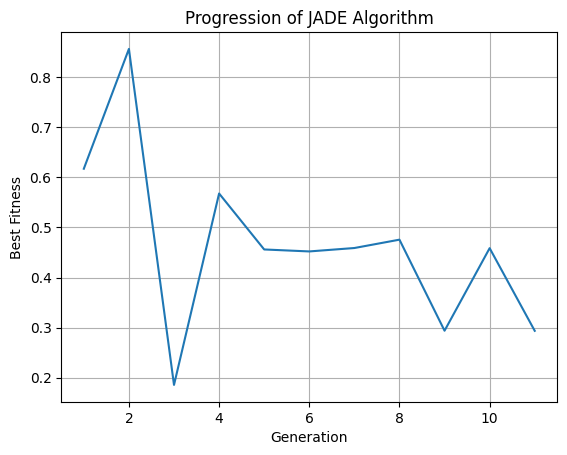

Generation 12/200 - Best Fitness: 0.3485436737537384
Generation 13/200 - Best Fitness: 0.4339224398136139
Generation 14/200 - Best Fitness: 0.34680479764938354
Generation 15/200 - Best Fitness: 0.24475505948066711
Generation 16/200 - Best Fitness: 0.22875219583511353
Generation 17/200 - Best Fitness: 0.1655462086200714
Generation 18/200 - Best Fitness: 0.16081707179546356
Generation 19/200 - Best Fitness: 0.1385480910539627
Generation 20/200 - Best Fitness: 0.18207140266895294
Generation 21/200 - Best Fitness: 0.17779263854026794


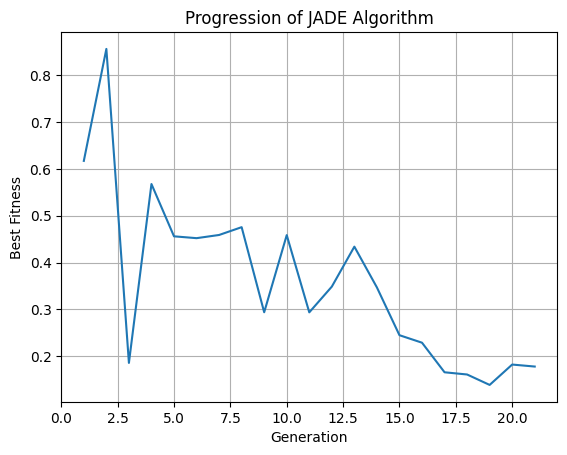

Generation 22/200 - Best Fitness: 0.14671559631824493
Generation 23/200 - Best Fitness: 0.11446992307901382
Generation 24/200 - Best Fitness: 0.09602057188749313
Generation 25/200 - Best Fitness: 0.09602057188749313
Generation 26/200 - Best Fitness: 0.0917668491601944
Generation 27/200 - Best Fitness: 0.0910862609744072
Generation 28/200 - Best Fitness: 0.07986446470022202
Terminating due to fitness threshold reached.
Run 3/5 - Random Seed: 461
Generation 1/200 - Best Fitness: 0.5907167792320251


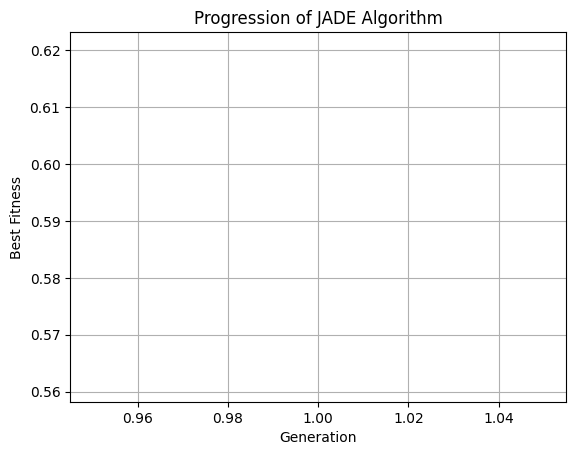

Generation 2/200 - Best Fitness: 0.6837221384048462
Generation 3/200 - Best Fitness: 0.6837384700775146
Generation 4/200 - Best Fitness: 0.5324937105178833
Generation 5/200 - Best Fitness: 0.32012078166007996
Generation 6/200 - Best Fitness: 0.4736693501472473
Generation 7/200 - Best Fitness: 0.4981284439563751
Generation 8/200 - Best Fitness: 0.2287122756242752
Generation 9/200 - Best Fitness: 0.39442178606987
Generation 10/200 - Best Fitness: 0.28674307465553284
Generation 11/200 - Best Fitness: 0.3352337181568146


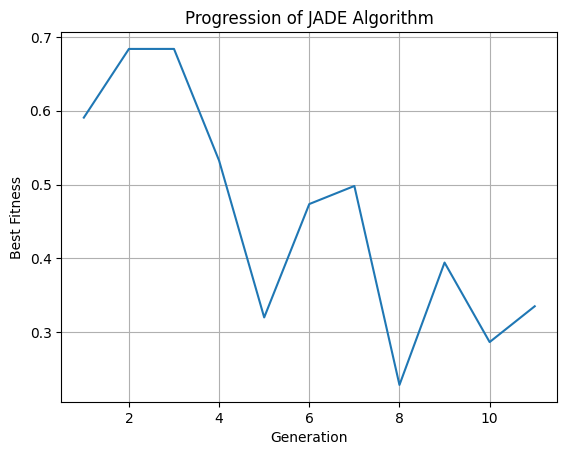

Generation 12/200 - Best Fitness: 0.37749332189559937
Generation 13/200 - Best Fitness: 0.4394954741001129
Generation 14/200 - Best Fitness: 0.3975766599178314
Generation 15/200 - Best Fitness: 0.3678838610649109
Generation 16/200 - Best Fitness: 0.23223654925823212
Generation 17/200 - Best Fitness: 0.2308616191148758
Generation 18/200 - Best Fitness: 0.15507307648658752
Generation 19/200 - Best Fitness: 0.19162136316299438
Generation 20/200 - Best Fitness: 0.19011999666690826
Generation 21/200 - Best Fitness: 0.19747711718082428


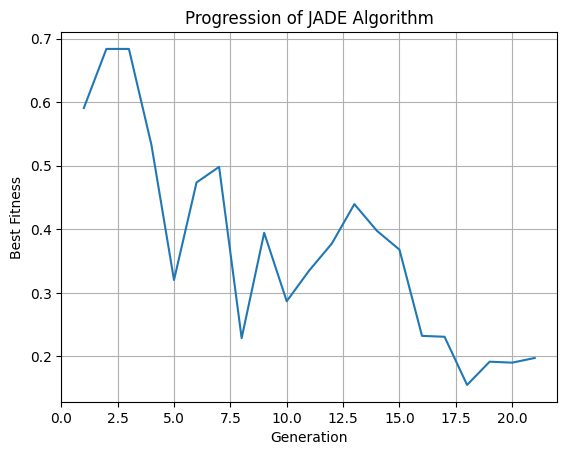

Generation 22/200 - Best Fitness: 0.1497669816017151
Generation 23/200 - Best Fitness: 0.14394541084766388
Generation 24/200 - Best Fitness: 0.12072151154279709


In [ ]:
from scipy.stats import cauchy
import matplotlib.pyplot as plt

# Run both algorithms multiple times
success_rates = run_algorithm_multiple_times(jade, fitness_function, population2, num_runs=5, dim=vector_length, NP=population_size, CR=0.9, F=0.8, max_gen=200)